**1. Bibliotecas**

In [43]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
!pip install -q mediapy
import mediapy as media

**2. Leer imagen**

In [18]:
img = media.read_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/butterfly.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

3. Filtros lineales

In [ ]:
kernel_identidad = np.array([[0,0,0], 
                             [0,1,0], 
                             [0,0,0]])
display(kernel_identidad)
outputid = cv.filter2D(img, -1, kernel_identidad)
comparativa = np.concatenate((img, outputid), axis=1) 
plt.imshow(comparativa, cmap='gray')
plt.title('Imagen original y filtro identidad')
plt.show()

In [ ]:
kernel_3x3 = np.ones((3,3), np.float32) / 9.0
display(kernel_3x3)
kernel_5x5 = np.ones((5,5),np.float32) / 25.0
kernel_7x7 = np.ones((7,7), np.float32) / 49.0

In [ ]:
output3x3 = cv.filter2D(img, -1, kernel_3x3)
output5x5 = cv.filter2D(img, -1, kernel_5x5)
output7x7 = cv.filter2D(img, -1, kernel_7x7)

plt.subplot(2,2,1),plt.imshow(img, cmap='gray'), plt.title('Imagen original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(output3x3, cmap='gray'), plt.title('Imagen salida filtro 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(output5x5, cmap='gray'), plt.title('Imagen salida filtro 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(output7x7, cmap='gray'), plt.title('Imagen salida filtro 7x7')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from skimage.util import random_noise
img_ruido = random_noise(img, mode='gaussian')

plt.imshow(img_ruido, cmap='gray')
plt.show()

blurred = cv.GaussianBlur(img_ruido, (5, 5), 3)
plt.imshow(blurred, cmap='gray')
plt.title('Imagen salida filtro gaussiano')
plt.show()

4. Filtros no lineales
- Mediana
- Máximo
- Mínimo


In [ ]:
img = media.read_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/blox.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
from skimage.util import random_noise

img_ruido = random_noise(img, mode='s&p')
img_ruido = cv.normalize(img_ruido, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

plt.imshow(img_ruido, cmap='gray')
plt.show()


mediana = cv.medianBlur(img_ruido, 3)
gaussiana = cv.GaussianBlur(img_ruido, (3,3), 0)

comparativa = np.concatenate((mediana, gaussiana), axis=1) 
plt.imshow(comparativa, cmap='gray')
plt.title('Filtro de mediana y gaussiano')
plt.show()


Ejercicio: Aplica el filtro kernel_7x7 a la anterior imagen con ruido (img_ruido), la imagen resultante debes compararla con las imágenes mediana y gaussiana.

In [ ]:
img = media.read_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/LinuxLogo.jpg')
#img = cv.bitwise_not(img)
plt.imshow(img, cmap='gray')
plt.show()

kernel = cv.getStructuringElement(cv.MORPH_RECT, (7,7))

imgMax= cv.dilate(img, kernel) # Máximo
plt.figure(figsize=(8, 6))
plt.imshow(imgMax, cmap='gray')
plt.title('Dilatación')
plt.show()

imgMin = cv.erode(img, kernel) # Mínimo
plt.figure(figsize=(8, 6))
plt.imshow(imgMin, cmap='gray')
plt.title('Erosión')
plt.show()


5. Filtros detectores de bordes

In [56]:
img = media.read_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
roberts_vertical = np.array( [[ 0, 0, 0 ],
                              [ 0, 1, 0 ],
                              [ 0, 0,-1 ]])
roberts_horizontal = np.array( [[ 0, 0, 0 ],
                                [ 0, 0, 1 ],
                                [ 0,-1, 0 ]])

img_roberts_x = cv.filter2D(img, -1, roberts_vertical)
img_roberts_y = cv.filter2D(img, -1, roberts_horizontal)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_roberts_x + img_roberts_y, cmap = 'gray')
plt.title('Roberts'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_roberts_x, cmap = 'gray')
plt.title('Roberts X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_roberts_y, cmap = 'gray')
plt.title('Roberts Y'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img, -1, kernelx)
img_prewitty = cv.filter2D(img, -1, kernely)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_prewittx + img_prewitty, cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_prewittx, cmap = 'gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_prewitty, cmap = 'gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img_sobel_x = cv.Sobel(img, cv.CV_8U, 1, 0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_8U, 0, 1, ksize=3)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_sobel_x + img_sobel_y, cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(img_sobel_x, cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(img_sobel_y, cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


**Ejercicio**: Realizar la implementación del filtro sobel, los coeficientes son mostrados en la imagen siguiente.
Para verificar si tú implementación es correcta, deberas verificarlo apoyandote del siguiente código.
display(np.sum(img_sobel_x_funcionOPENCV - img_sobel_x1_TúImplementación))

Puedes apoyarte del código implementado del filtro prewitt. 


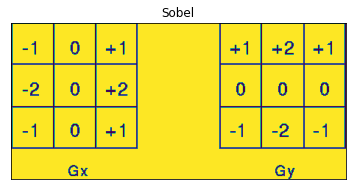

In [57]:
sobel = media.read_image('https://homepages.inf.ed.ac.uk/rbf/HIPR2/figs/sobmasks.gif')
plt.imshow(sobel)
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
Gaussian = cv.GaussianBlur(img, (3, 3), 3)
LoG = cv.Laplacian(Gaussian, cv.CV_8U, ksize=3)

plt.subplot(2,2,1),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(Gaussian, cmap = 'gray')
plt.title('Gaussiano'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(LoG, cmap = 'gray')
plt.title('Laplaciano'), plt.xticks([]), plt.yticks([])
plt.show()

3. Aplicar filtro de detección de bordes a una imagen previamente suavizada con un kernel de media de 7x7.

kernel_7x7 = np.ones((7,7), np.float32) / 49.0

El filtro que deben utilizar será el filtro sobel que implementaron en el ejercicio anterior.


Ejercicios extras

1. Experimentar cambiando el tamaño del filtro o kernel en cada uno de los ejemplos anteriores.
2. Implementar función de convolución.
